In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv(r'house-prices-advanced-regression-techniques\train.csv')
df = df.convert_dtypes()
df.shape

(1460, 81)

In [3]:
pd.options.display.max_columns = 81
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,<NA>,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,<NA>,<NA>,<NA>,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,<NA>,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,<NA>,<NA>,<NA>,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,<NA>,<NA>,<NA>,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,<NA>,<NA>,<NA>,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,<NA>,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,<NA>,<NA>,<NA>,0,12,2008,WD,Normal,250000


In [4]:
df = df.drop('Id', axis=1)
y_train = df.pop('SalePrice')
x_train = df

In [5]:
x_train.shape, y_train.shape

((1460, 79), (1460,))

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   Int64 
 1   MSZoning       1460 non-null   string
 2   LotFrontage    1201 non-null   Int64 
 3   LotArea        1460 non-null   Int64 
 4   Street         1460 non-null   string
 5   Alley          91 non-null     string
 6   LotShape       1460 non-null   string
 7   LandContour    1460 non-null   string
 8   Utilities      1460 non-null   string
 9   LotConfig      1460 non-null   string
 10  LandSlope      1460 non-null   string
 11  Neighborhood   1460 non-null   string
 12  Condition1     1460 non-null   string
 13  Condition2     1460 non-null   string
 14  BldgType       1460 non-null   string
 15  HouseStyle     1460 non-null   string
 16  OverallQual    1460 non-null   Int64 
 17  OverallCond    1460 non-null   Int64 
 18  YearBuilt      1460 non-null

In [7]:
obj_columns = []

for i in x_train.columns:
    if x_train[i].dtype == 'string[python]':
        obj_columns.append(i)
len(obj_columns)

43

In [8]:
x_train1 = pd.get_dummies(x_train, columns=obj_columns)
x_train1.shape

(1460, 288)

In [9]:
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: Int64(36), uint8(252)
memory usage: 821.4 KB


In [10]:
x_train = x_train1.fillna(-1)

In [11]:
def cov_dummies(df):
    df = df.convert_dtypes()
    df = df.drop('Id', axis=1)
    obj_columns = []
    for i in df.columns:
        if df[i].dtype == 'string[python]':
            obj_columns.append(i)
    
    df = pd.get_dummies(df, columns=obj_columns)
    df = df.fillna(-1)
    return df

In [12]:
df1 = pd.read_csv(r'house-prices-advanced-regression-techniques\test.csv')
x_test = cov_dummies(df1)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: Int64(36), uint8(234)
memory usage: 795.2 KB


In [13]:
temp = []
for i in x_train1.columns:
    if i in x_test.columns:
        temp.append(i)
len(temp)

270

In [14]:
x_train = x_train[temp]
x_test = x_test[temp]

In [15]:
model = Sequential([
    Dense(300),
    Dropout(0.5),
    Dense(100),
    Dense(10),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam', metrics=['accuracy', 'mae'])

In [16]:
x_train, y_train = x_train.astype('int64'), y_train.astype('int64')

In [17]:
x_test = x_test.astype('int64')

In [18]:
delta = round((x_train.max().sort_values(ascending=False).mean() + y_train.mean()) / 2)
delta

90970

In [19]:
x_train, y_train, x_test = x_train / delta, y_train / delta, x_test / delta

Epoch 1/15
46/46 [==============================] - 2s 8ms/step - loss: 1.3375 - accuracy: 0.0000e+00 - mae: 0.8365
Epoch 2/15
46/46 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.0000e+00 - mae: 0.5827
Epoch 3/15
46/46 [==============================] - 0s 8ms/step - loss: 0.6260 - accuracy: 0.0000e+00 - mae: 0.5724
Epoch 4/15
46/46 [==============================] - 0s 8ms/step - loss: 0.5571 - accuracy: 0.0000e+00 - mae: 0.5354
Epoch 5/15
46/46 [==============================] - 0s 7ms/step - loss: 0.4714 - accuracy: 0.0000e+00 - mae: 0.4814
Epoch 6/15
46/46 [==============================] - 0s 7ms/step - loss: 0.3600 - accuracy: 0.0000e+00 - mae: 0.4105
Epoch 7/15
46/46 [==============================] - 0s 8ms/step - loss: 0.3101 - accuracy: 0.0000e+00 - mae: 0.3695
Epoch 8/15
46/46 [==============================] - 0s 7ms/step - loss: 0.2795 - accuracy: 0.0000e+00 - mae: 0.3572
Epoch 9/15
46/46 [==============================] - 0s 7ms/step - loss: 

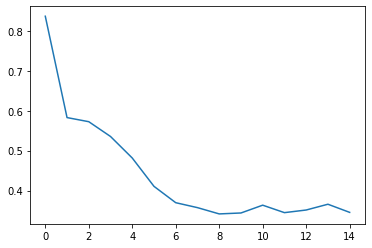

In [20]:
history = model.fit(x_train.values, y_train.values, epochs=15)
plt.plot(history.history['mae']);

In [21]:
y_test = model.predict(x_test)
y_test

46/46 [==============================] - 1s 4ms/step


array([[1.7022163],
       [1.9504249],
       [2.219764 ],
       ...,
       [2.2514274],
       [1.1746489],
       [2.633428 ]], dtype=float32)

In [22]:
y_df = pd.DataFrame(y_test*delta, columns=['SalePrice'])
y_df.head()

,SalePrice
0,154850.613862
1,177430.154026
2,201931.930554
3,205593.305268
4,183334.490278


In [27]:
submission = pd.concat([df1['Id'], y_df], axis=1)
submission.head()

,Id,SalePrice
0,1461,154850.613862
1,1462,177430.154026
2,1463,201931.930554
3,1464,205593.305268
4,1465,183334.490278


In [28]:
submission.to_csv('submission.csv', index=False)